# GRIPJUNE2021 @ The Spark Foundation

## Data Science and Business Analytics

## Task #2: Prediction using Unsupervised Machine Learning.
### Objective : Predict the optimum number of clusters and represent it visually. 
### Author: Ashish Singh

#### Importing libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

#get the data set
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### To check wether the datasets has any null value

In [2]:
iris_df.isnull().any()

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
dtype: bool

#### To know more about the dataset.

In [3]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### To find the optimum number of cluster for k-means classification

In [4]:
x=iris_df.iloc[:,[1,2,3]].values

from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans= KMeans(n_clusters =i, init='k-means++',max_iter=300, n_init=10, random_state=0)
    
    kmeans.fit(x)
   
    wcss.append(kmeans.inertia_)
    

C:\Users\Ashish Singh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


#### Ploting the result onto a graph

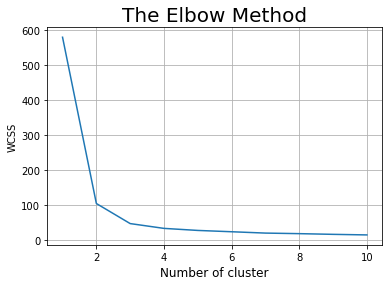

In [5]:
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method", size=20)
plt.xlabel("Number of cluster", size=12)
plt.ylabel('WCSS') 
plt.grid()
plt.show()



#### From this we can infer "3" as the number of clusters.

#### Now applying kmeans to the dataset / Creating the kmeans classifier

In [6]:
kmeans= KMeans(n_clusters = 3, init='k-means++',
              max_iter=300, n_init=10, random_state=0)
y_kmeans= kmeans.fit_predict(x)

### Visualising the cluster - On the first two columns

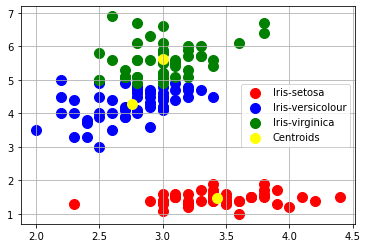

In [7]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0, 1],
           s=100, c='red', label='Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.grid()
plt.legend()

#### From above we can conclude that the k-Means works.